In [65]:
# steps to complete:
# 1) import libraries
# 2) import dataset
# 3) convert JSON data to columns   
# 4) rearrange columns  
# 5) create new column of time difference between in and out
# 6) delete rows of adoptable dogs
# 7) change true false to 1 - 0    
# 6) define x and y    
# 7) split data in training and test data 

In [66]:
# import libraries

import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from pandas import json_normalize
import datetime
import typing
import time
import seaborn as sns



In [67]:
# Import dataset

df = pd.read_csv("pet-adoption.csv")
df.drop(['id', 'organization_id', 'url', 'species','organization_animal_id','tags', 'photos','primary_photo_cropped', 'videos', 'distance', 'contact', '_links', 'description', 'colors'], axis=1, inplace=True)
df.head()


,type,breeds,age,gender,size,coat,attributes,environment,name,status,status_changed_at,published_at
0,Dog,"{'primary': 'Terrier', 'secondary': 'Pug', 'mi...",Young,Male,Small,Short,"{'spayed_neutered': 'True', 'house_trained': '...","{'children': 'None', 'dogs': 'True', 'cats': '...",Ruff,adopted,2020-08-16 18:21:00+00:00,2020-07-21 20:52:42+00:00
1,Dog,"{'primary': 'German Shepherd Dog', 'secondary'...",Adult,Female,Medium,Medium,"{'spayed_neutered': 'True', 'house_trained': '...","{'children': 'None', 'dogs': 'None', 'cats': '...",Delilah,adopted,2020-07-31 01:39:20+00:00,2020-07-21 13:17:11+00:00
2,Dog,"{'primary': 'Dogue de Bordeaux', 'secondary': ...",Adult,Male,Extra Large,None,"{'spayed_neutered': 'True', 'house_trained': '...","{'children': 'None', 'dogs': 'None', 'cats': '...",Red,adoptable,2020-07-21 14:00:23+00:00,2020-07-21 14:00:23+00:00
3,Dog,"{'primary': 'Labrador Retriever', 'secondary':...",Young,Male,Medium,None,"{'spayed_neutered': 'True', 'house_trained': '...","{'children': 'True', 'dogs': 'True', 'cats': '...",Louie,adopted,2020-07-26 15:50:42+00:00,2020-07-21 20:05:39+00:00
4,Dog,"{'primary': 'Border Collie', 'secondary': 'Non...",Adult,Male,Medium,Long,"{'spayed_neutered': 'True', 'house_trained': '...","{'children': 'None', 'dogs': 'None', 'cats': '...",Kenny,adopted,2020-07-23 16:00:20+00:00,2020-07-21 17:17:43+00:00


In [68]:
# convert json to data

values = [json.loads(value.replace("'", "\"")) for value in df['attributes'].values]
df1 = json_normalize(values)
df1.head()

col = df.columns.difference(['attributes'])
df = pd.concat([df[col], df1],axis=1)
df.head()


,age,breeds,coat,environment,gender,name,published_at,size,status,status_changed_at,type,spayed_neutered,house_trained,declawed,special_needs,shots_current
0,Young,"{'primary': 'Terrier', 'secondary': 'Pug', 'mi...",Short,"{'children': 'None', 'dogs': 'True', 'cats': '...",Male,Ruff,2020-07-21 20:52:42+00:00,Small,adopted,2020-08-16 18:21:00+00:00,Dog,True,True,None,False,True
1,Adult,"{'primary': 'German Shepherd Dog', 'secondary'...",Medium,"{'children': 'None', 'dogs': 'None', 'cats': '...",Female,Delilah,2020-07-21 13:17:11+00:00,Medium,adopted,2020-07-31 01:39:20+00:00,Dog,True,False,None,False,True
2,Adult,"{'primary': 'Dogue de Bordeaux', 'secondary': ...",None,"{'children': 'None', 'dogs': 'None', 'cats': '...",Male,Red,2020-07-21 14:00:23+00:00,Extra Large,adoptable,2020-07-21 14:00:23+00:00,Dog,True,False,None,False,True
3,Young,"{'primary': 'Labrador Retriever', 'secondary':...",None,"{'children': 'True', 'dogs': 'True', 'cats': '...",Male,Louie,2020-07-21 20:05:39+00:00,Medium,adopted,2020-07-26 15:50:42+00:00,Dog,True,True,None,False,True
4,Adult,"{'primary': 'Border Collie', 'secondary': 'Non...",Long,"{'children': 'None', 'dogs': 'None', 'cats': '...",Male,Kenny,2020-07-21 17:17:43+00:00,Medium,adopted,2020-07-23 16:00:20+00:00,Dog,True,True,None,False,True


In [69]:
values = [json.loads(value.replace("'", "\"")) for value in df['environment'].values]

df1 = json_normalize(values)
df1.head()

col = df.columns.difference(['environment'])
df = pd.concat([df[col], df1],axis=1)
df.head()

,age,breeds,coat,declawed,gender,house_trained,name,published_at,shots_current,size,spayed_neutered,special_needs,status,status_changed_at,type,children,dogs,cats
0,Young,"{'primary': 'Terrier', 'secondary': 'Pug', 'mi...",Short,None,Male,True,Ruff,2020-07-21 20:52:42+00:00,True,Small,True,False,adopted,2020-08-16 18:21:00+00:00,Dog,None,True,None
1,Adult,"{'primary': 'German Shepherd Dog', 'secondary'...",Medium,None,Female,False,Delilah,2020-07-21 13:17:11+00:00,True,Medium,True,False,adopted,2020-07-31 01:39:20+00:00,Dog,None,None,None
2,Adult,"{'primary': 'Dogue de Bordeaux', 'secondary': ...",None,None,Male,False,Red,2020-07-21 14:00:23+00:00,True,Extra Large,True,False,adoptable,2020-07-21 14:00:23+00:00,Dog,None,None,None
3,Young,"{'primary': 'Labrador Retriever', 'secondary':...",None,None,Male,True,Louie,2020-07-21 20:05:39+00:00,True,Medium,True,False,adopted,2020-07-26 15:50:42+00:00,Dog,True,True,True
4,Adult,"{'primary': 'Border Collie', 'secondary': 'Non...",Long,None,Male,True,Kenny,2020-07-21 17:17:43+00:00,True,Medium,True,False,adopted,2020-07-23 16:00:20+00:00,Dog,None,None,None


In [70]:
# # convert json to data

values = [json.loads(value.replace("'", "\"")) for value in df['breeds'].values]
df1 = json_normalize(values)
df1.head()

col = df.columns.difference(['breeds'])
df = pd.concat([df[col], df1],axis=1)
df.head()

,age,cats,children,coat,declawed,dogs,gender,house_trained,name,published_at,...,size,spayed_neutered,special_needs,status,status_changed_at,type,primary,secondary,mixed,unknown
0,Young,None,None,Short,None,True,Male,True,Ruff,2020-07-21 20:52:42+00:00,...,Small,True,False,adopted,2020-08-16 18:21:00+00:00,Dog,Terrier,Pug,True,False
1,Adult,None,None,Medium,None,None,Female,False,Delilah,2020-07-21 13:17:11+00:00,...,Medium,True,False,adopted,2020-07-31 01:39:20+00:00,Dog,German Shepherd Dog,None,True,False
2,Adult,None,None,None,None,None,Male,False,Red,2020-07-21 14:00:23+00:00,...,Extra Large,True,False,adoptable,2020-07-21 14:00:23+00:00,Dog,Dogue de Bordeaux,Mixed Breed,True,False
3,Young,True,True,None,None,True,Male,True,Louie,2020-07-21 20:05:39+00:00,...,Medium,True,False,adopted,2020-07-26 15:50:42+00:00,Dog,Labrador Retriever,Black Mouth Cur,True,False
4,Adult,None,None,Long,None,None,Male,True,Kenny,2020-07-21 17:17:43+00:00,...,Medium,True,False,adopted,2020-07-23 16:00:20+00:00,Dog,Border Collie,None,True,False


In [71]:
#  drop columns

df = df.loc[:, ['published_at', 'status_changed_at', 'status','type', 'primary','name', 'gender','age', 'size', 'coat', 'house_trained', 'shots_current', 'spayed_neutered', 'special_needs', 'children', 'dogs', 'cats']]
df.head()

,published_at,status_changed_at,status,type,primary,name,gender,age,size,coat,house_trained,shots_current,spayed_neutered,special_needs,children,dogs,cats
0,2020-07-21 20:52:42+00:00,2020-08-16 18:21:00+00:00,adopted,Dog,Terrier,Ruff,Male,Young,Small,Short,True,True,True,False,None,True,None
1,2020-07-21 13:17:11+00:00,2020-07-31 01:39:20+00:00,adopted,Dog,German Shepherd Dog,Delilah,Female,Adult,Medium,Medium,False,True,True,False,None,None,None
2,2020-07-21 14:00:23+00:00,2020-07-21 14:00:23+00:00,adoptable,Dog,Dogue de Bordeaux,Red,Male,Adult,Extra Large,None,False,True,True,False,None,None,None
3,2020-07-21 20:05:39+00:00,2020-07-26 15:50:42+00:00,adopted,Dog,Labrador Retriever,Louie,Male,Young,Medium,None,True,True,True,False,True,True,True
4,2020-07-21 17:17:43+00:00,2020-07-23 16:00:20+00:00,adopted,Dog,Border Collie,Kenny,Male,Adult,Medium,Long,True,True,True,False,None,None,None


In [72]:
time_in = df.iloc[0]['published_at']
time_in = datetime.datetime.strptime(time_in[0:10], "%Y-%m-%d")
time_in

datetime.datetime(2020, 7, 21, 0, 0)

In [73]:
time_out = df.iloc[0]['status_changed_at']
time_out = datetime.datetime.strptime(time_out[0:10], "%Y-%m-%d")
time_out

datetime.datetime(2020, 8, 16, 0, 0)

In [74]:
time_out - time_in 

datetime.timedelta(days=26)

In [75]:
# make outcome variable

days_in_rescue = []

for i, value in enumerate(df['published_at']):
    time_in = df.iloc[i]['published_at']
    time_in = datetime.datetime.strptime(time_in[0:10], "%Y-%m-%d")
    time_out = df.iloc[i]['status_changed_at']
    time_out = datetime.datetime.strptime(time_out[0:10], "%Y-%m-%d")
    time_difference = time_out - time_in
    days_in_rescue.append(time_difference.days)

df['time_in_rescue'] = days_in_rescue
df.drop(['published_at', 'status_changed_at'], axis=1, inplace=True)
df.head()


,status,type,primary,name,gender,age,size,coat,house_trained,shots_current,spayed_neutered,special_needs,children,dogs,cats,time_in_rescue
0,adopted,Dog,Terrier,Ruff,Male,Young,Small,Short,True,True,True,False,None,True,None,26
1,adopted,Dog,German Shepherd Dog,Delilah,Female,Adult,Medium,Medium,False,True,True,False,None,None,None,10
2,adoptable,Dog,Dogue de Bordeaux,Red,Male,Adult,Extra Large,None,False,True,True,False,None,None,None,0
3,adopted,Dog,Labrador Retriever,Louie,Male,Young,Medium,None,True,True,True,False,True,True,True,5
4,adopted,Dog,Border Collie,Kenny,Male,Adult,Medium,Long,True,True,True,False,None,None,None,2


In [76]:
# drop adoptable dogs

df.drop(df[df.status == 'adoptable'].index, inplace=True)
df

,status,type,primary,name,gender,age,size,coat,house_trained,shots_current,spayed_neutered,special_needs,children,dogs,cats,time_in_rescue
0,adopted,Dog,Terrier,Ruff,Male,Young,Small,Short,True,True,True,False,None,True,None,26
1,adopted,Dog,German Shepherd Dog,Delilah,Female,Adult,Medium,Medium,False,True,True,False,None,None,None,10
3,adopted,Dog,Labrador Retriever,Louie,Male,Young,Medium,None,True,True,True,False,True,True,True,5
4,adopted,Dog,Border Collie,Kenny,Male,Adult,Medium,Long,True,True,True,False,None,None,None,2
5,adopted,Dog,Labrador Retriever,Stormy,Male,Senior,Large,Medium,True,True,True,False,True,True,True,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,adopted,Dog,Shepherd,Perch,Male,Baby,Medium,Short,False,True,True,False,True,True,None,0
717,adopted,Dog,Boxer,Dina,Female,Young,Medium,Short,False,True,True,False,None,None,None,9
719,adopted,Dog,Terrier,Omar,Male,Baby,Medium,Medium,True,True,True,False,None,True,None,26
720,adopted,Dog,Shepherd,Dora,Female,Baby,Large,None,False,True,False,False,True,True,None,0


In [77]:
# transform true false to 1 -0 

data1_bool = df.copy()
data1_bool['house_trained'] = data1_bool['house_trained'].map({'True': True, 'False': False})
data1_bool['shots_current'] = data1_bool['shots_current'].map({'True': True, 'False': False})
data1_bool['spayed_neutered'] = data1_bool['spayed_neutered'].map({'True': True, 'False': False})
data1_bool['children'] = data1_bool['children'].map({'True': True, 'None': False, 'False' : False})
data1_bool['dogs'] = data1_bool['dogs'].map({'True': True, 'None': False, 'False' : False})
data1_bool['cats'] = data1_bool['cats'].map({'True': True, 'None': False, 'False' : False})
data1_bool['special_needs'] = data1_bool['special_needs'].map({'True': True, 'None': False, 'False' : False})
data1_bool

,status,type,primary,name,gender,age,size,coat,house_trained,shots_current,spayed_neutered,special_needs,children,dogs,cats,time_in_rescue
0,adopted,Dog,Terrier,Ruff,Male,Young,Small,Short,True,True,True,False,False,True,False,26
1,adopted,Dog,German Shepherd Dog,Delilah,Female,Adult,Medium,Medium,False,True,True,False,False,False,False,10
3,adopted,Dog,Labrador Retriever,Louie,Male,Young,Medium,None,True,True,True,False,True,True,True,5
4,adopted,Dog,Border Collie,Kenny,Male,Adult,Medium,Long,True,True,True,False,False,False,False,2
5,adopted,Dog,Labrador Retriever,Stormy,Male,Senior,Large,Medium,True,True,True,False,True,True,True,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,adopted,Dog,Shepherd,Perch,Male,Baby,Medium,Short,False,True,True,False,True,True,False,0
717,adopted,Dog,Boxer,Dina,Female,Young,Medium,Short,False,True,True,False,False,False,False,9
719,adopted,Dog,Terrier,Omar,Male,Baby,Medium,Medium,True,True,True,False,False,True,False,26
720,adopted,Dog,Shepherd,Dora,Female,Baby,Large,None,False,True,False,False,True,True,False,0


In [78]:
data1_bool["house_trained"] = data1_bool["house_trained"].astype(int)
data1_bool["shots_current"] = data1_bool["shots_current"].astype(int)
data1_bool["spayed_neutered"] = data1_bool["spayed_neutered"].astype(int)
data1_bool["special_needs"] = data1_bool["special_needs"].astype(int)


In [79]:

data1_bool["children"] = data1_bool["children"].astype(int)
data1_bool["dogs"] = data1_bool["dogs"].astype(int)
data1_bool["cats"] = data1_bool["cats"].astype(int)



In [80]:
# update df

df = data1_bool
df.head()

,status,type,primary,name,gender,age,size,coat,house_trained,shots_current,spayed_neutered,special_needs,children,dogs,cats,time_in_rescue
0,adopted,Dog,Terrier,Ruff,Male,Young,Small,Short,1,1,1,0,0,1,0,26
1,adopted,Dog,German Shepherd Dog,Delilah,Female,Adult,Medium,Medium,0,1,1,0,0,0,0,10
3,adopted,Dog,Labrador Retriever,Louie,Male,Young,Medium,None,1,1,1,0,1,1,1,5
4,adopted,Dog,Border Collie,Kenny,Male,Adult,Medium,Long,1,1,1,0,0,0,0,2
5,adopted,Dog,Labrador Retriever,Stormy,Male,Senior,Large,Medium,1,1,1,0,1,1,1,12


In [81]:
# check for missing data gives 0 missing data.

df.isnull().sum()

status             0
type               0
primary            0
name               0
gender             0
age                0
size               0
coat               0
house_trained      0
shots_current      0
spayed_neutered    0
special_needs      0
children           0
dogs               0
cats               0
time_in_rescue     0
dtype: int64

In [82]:
# set x and y

y = df['time_in_rescue']
x = df[['house_trained', 'shots_current', 'spayed_neutered', 'special_needs', 'children', 'dogs', 'cats']]

In [83]:
#  test fit for all indep variables

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 5.3065582294665585
Coefficients: 
 [ 1.66474238  2.64113249 -0.69368726  4.67985029 -2.99392039  1.15682757
  0.37544032]


In [84]:
# show correlation matrix

df.corr()

/var/folders/bx/c7_76bgj2zs1_dhl31l18hxc0000gp/T/ipykernel_1056/796203143.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,house_trained,shots_current,spayed_neutered,special_needs,children,dogs,cats,time_in_rescue
house_trained,1.000000,0.163006,0.243611,0.121479,0.281518,0.263965,0.077728,0.099749
shots_current,0.163006,1.000000,0.495382,0.062168,0.182305,0.215743,0.089081,0.127210
spayed_neutered,0.243611,0.495382,1.000000,0.043912,0.104754,0.121716,0.080515,0.048914
special_needs,0.121479,0.062168,0.043912,1.000000,-0.018148,0.023483,0.005538,0.116175
children,0.281518,0.182305,0.104754,-0.018148,1.000000,0.588072,0.439604,-0.107371
dogs,0.263965,0.215743,0.121716,0.023483,0.588072,1.000000,0.399301,0.018029
cats,0.077728,0.089081,0.080515,0.005538,0.439604,0.399301,1.000000,-0.020369
time_in_rescue,0.099749,0.127210,0.048914,0.116175,-0.107371,0.018029,-0.020369,1.000000


In [85]:
# describe the data

# to no one in particular:
# i think it's funny how the mean of binary data is meaningful in the sense that
# it directly reflects the percentage of the population that has a certain attribute. 

df.describe()

,house_trained,shots_current,spayed_neutered,special_needs,children,dogs,cats,time_in_rescue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.347826,0.824111,0.747036,0.017787,0.511858,0.697628,0.314229,7.019763
std,0.476752,0.381103,0.435141,0.132306,0.500354,0.459740,0.464668,6.933889
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,5.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000


<AxesSubplot: title={'center': 'Amount of dogs per breed that are adopted'}>

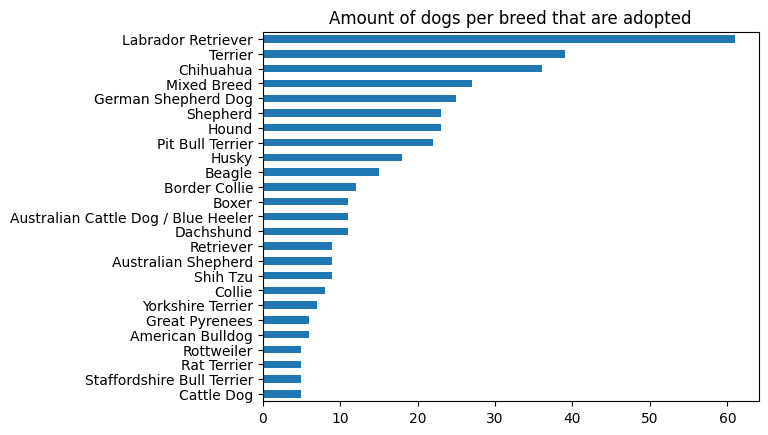

In [86]:
# show the most common types of dogs that enter and exit the animal shelter, for curiosity sake.

df['primary'].value_counts()[:25].sort_values().plot(kind='barh', title='Amount of dogs per breed that are adopted')

<AxesSubplot: title={'center': 'Age stratification of adopted dogs'}>

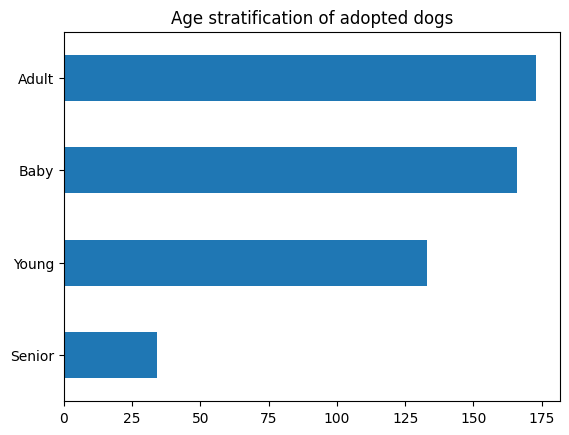

In [87]:
df['age'].value_counts().sort_values().plot(kind='barh', title='Age stratification of adopted dogs')

Text(0.5, 1.0, 'Outcome variable histogram')

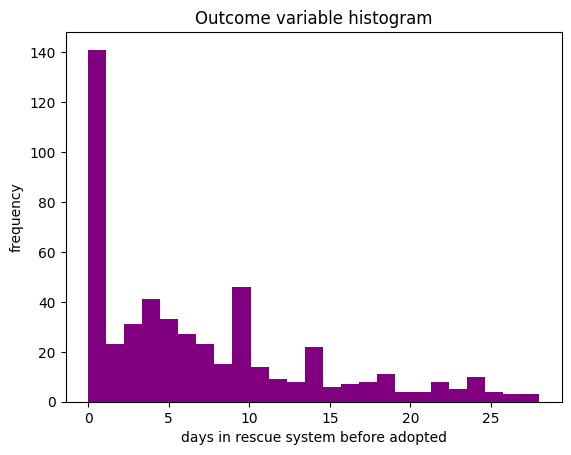

In [89]:
# plot outcome variable in historgram

plt.hist(df['time_in_rescue'], color='purple', bins=25)
plt.xlabel('days in rescue system before adopted')
plt.ylabel('frequency')
plt.title('Outcome variable histogram')